# Data Cleaning of US Avocado Sales

In [1]:
import pandas as pd

In [7]:
data = pd.read_csv('avocado.csv') # Read the data


data = data.drop(['AveragePrice', 'Unnamed: 0',
                  '4046', '4225', '4770', 'Total Bags',
                  'Small Bags', 'Large Bags', 'XLarge Bags', 
                  'type'], axis=1) # Drop the columns

data.head()


,Date,Total Volume,year,region
0,2015-12-27,64236.62,2015,Albany
1,2015-12-20,54876.98,2015,Albany
2,2015-12-13,118220.22,2015,Albany
3,2015-12-06,78992.15,2015,Albany
4,2015-11-29,51039.60,2015,Albany


In [8]:
UniqueRegions = data.region.unique()
print(print("\n".join(UniqueRegions)))

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico
None


In [9]:
RegionDict = {elem : pd.DataFrame() for elem in UniqueRegions}

for key in RegionDict.keys():
    RegionDict[key] = data[:][data.region == key]

In [29]:
denver_data = RegionDict[UniqueRegions[12]]


boston_data = RegionDict[UniqueRegions[3]]

In [30]:
denver_data.head()

,Date,Total Volume,year,region
624,2015-12-27,625475.10,2015,Denver
625,2015-12-20,528944.54,2015,Denver
626,2015-12-13,741702.50,2015,Denver
627,2015-12-06,838225.19,2015,Denver
628,2015-11-29,429109.64,2015,Denver


In [32]:
UniqueYear = denver_data.year.unique()
print(print("\n".join(UniqueYear.astype(str))))

2015
2016
2017
2018
None


In [52]:
denver_dict = {elem : pd.DataFrame() for elem in UniqueYear}

for key in denver_dict.keys():
    denver_dict[key] = denver_data[:][denver_data.year == key]

In [61]:
denver_2015 = denver_dict[UniqueYear[0]]

In [63]:
denver_2015.tail()

,Date,Total Volume,year,region
9752,2015-12-13,24285.79,2015,Denver
625,2015-12-20,528944.54,2015,Denver
9751,2015-12-20,27173.38,2015,Denver
9750,2015-12-27,23728.62,2015,Denver
624,2015-12-27,625475.10,2015,Denver


In [43]:
for i in denver_dict:
    denver_dict[i]['Date'] = denver_dict['Date'].dt.isocalendar().week

KeyError: 'Date'

In [104]:
boston_data = RegionDict[UniqueRegions[4]]

UniqueYear = boston_data.year.unique()
print(print("\n".join(UniqueYear.astype(str))))

boston_dict = {elem : pd.DataFrame() for elem in UniqueYear}

for key in boston_dict.keys():
    boston_dict[key] = boston_data[:][boston_data.year == key]

boston_2015 = boston_dict[UniqueYear[0]]


2015
2016
2017
2018
None


In [105]:
len(boston_2015)



In [106]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(boston_2015)

           Date  Total Volume  year  region
0    2015-12-27     450816.39  2015  Boston
1    2015-12-20     489802.88  2015  Boston
2    2015-12-13     549945.76  2015  Boston
3    2015-12-06     488679.31  2015  Boston
4    2015-11-29     350559.81  2015  Boston
5    2015-11-22     466759.99  2015  Boston
6    2015-11-15     513738.98  2015  Boston
7    2015-11-08     641759.57  2015  Boston
8    2015-11-01     553096.84  2015  Boston
9    2015-10-25     534249.47  2015  Boston
10   2015-10-18     725296.29  2015  Boston
11   2015-10-11     485706.68  2015  Boston
12   2015-10-04     536479.42  2015  Boston
13   2015-09-27     553307.04  2015  Boston
14   2015-09-20     498640.23  2015  Boston
15   2015-09-13     655682.95  2015  Boston
16   2015-09-06     577774.74  2015  Boston
17   2015-08-30     526664.87  2015  Boston
18   2015-08-23     589471.32  2015  Boston
19   2015-08-16     565795.06  2015  Boston
20   2015-08-09     690517.19  2015  Boston
21   2015-08-02     571994.50  2

In [120]:

boston_2015 = boston_2015.sort_index(ascending=False)

boston_2015.reset_index(inplace=True, drop=True)


boston_2015['index'] = boston_2015.index


boston_final = boston_2015[52:]

<AxesSubplot: xlabel='index', ylabel='Total Volume'>

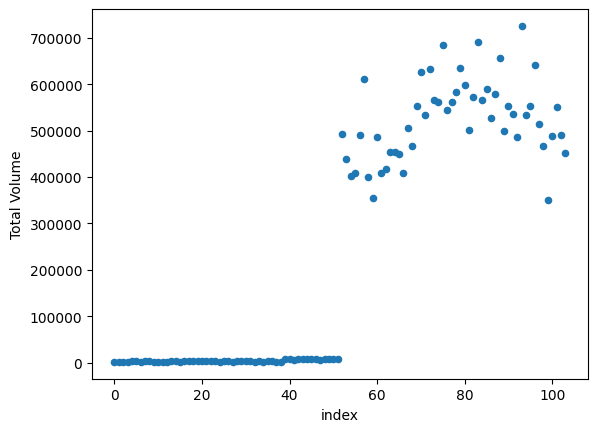

In [118]:
boston_2015.plot.scatter(x='index', y='Total Volume')

<AxesSubplot: xlabel='index', ylabel='Total Volume'>

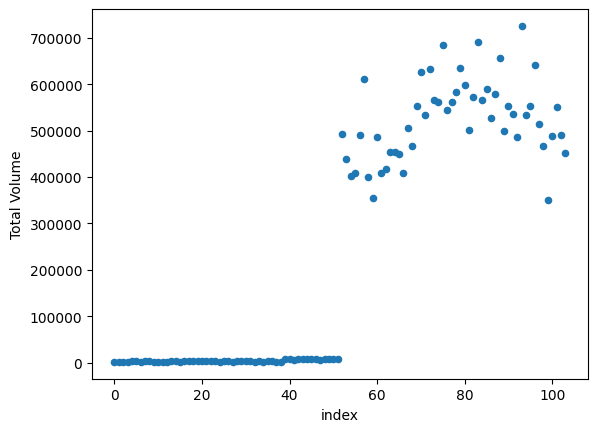

In [117]:
boston_2015.plot.scatter(x='index', y='Total Volume')

<AxesSubplot: xlabel='index', ylabel='Total Volume'>

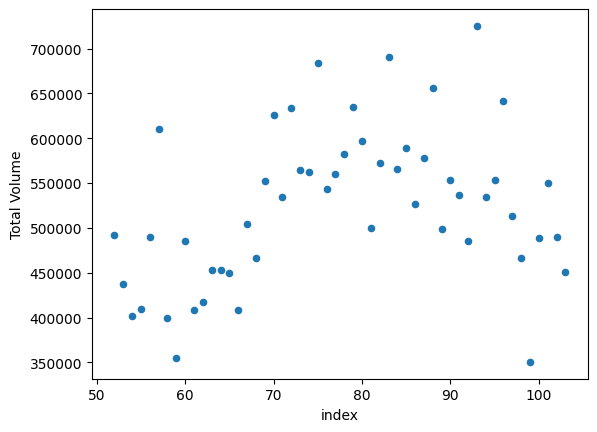

In [122]:
boston_final.plot.scatter(x='index', y='Total Volume')